Data mining - mini project 2
(Harsh Siroya)


The questions i am addressing are:
1. what is the most common genre of movies? and what is the total and mean box office revenue for each genre?
2. Is there a correlation between the actor age and the box office revenue? and what is the most common age of actors in the dataset? This will help us to know if the age of the actor has an impact on the box office revenue. Also the total box office revenue for each movie a specific actor has acted in. this will help us identify the most successful actors in the dataset. This we can also correlate with the number of movies an actor has acted in.
3. What is the total revenue per year? This will help us to know the trend of the box office revenue over the years, and if the revenue is increasing or decreasing.
3. Which movie is similar to the other movies in the dataset? This will help people watch movies that are similar to the movies they like. Just like the recommendation system in Netflix.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [27]:

character_metadata_cols = [
    "Wikipedia Movie ID", "Freebase Movie ID","Movie Release Date", "Character Name", "Actor DOB",
    "Actor Gender", "Actor Height", "Actor Ethnicity", "Actor Name",
    "Actor Age at Movie Release", "Freebase character map id", "Freebase character id", "Freebase actor id"
]
character_metadata_df = pd.read_csv("MovieSummaries/character.metadata.tsv", sep="\t", header=None, names=character_metadata_cols)

movie_metadata_cols = [
    "Wikipedia Movie ID", "Freebase Movie ID", "Movie Name", "Movie Release Date",
    "Movie Box Office Revenue", "Movie Runtime", "Movie Languages", "Movie Countries",
    "Movie Genres"
]
movie_metadata_df = pd.read_csv("MovieSummaries/movie.metadata.tsv", sep="\t", header=None, names=movie_metadata_cols)

plot_summaries_df = pd.read_csv("MovieSummaries/plot_summaries.txt", sep="\t", header=None, names=["Wikipedia Movie ID", "Plot Summary"])

name_clusters_df = pd.read_csv("MovieSummaries/name.clusters.txt", sep="\t", header=None, names=["Name", "Cluster ID"])

tvtropes_clusters_df = pd.read_csv("MovieSummaries/tvtropes.clusters.txt", sep="\t", header=None, names=["TV Trope", "Details"])


In [28]:
#Exploratory Data Anakysis 
print("\nMovie Metadata:")
print(movie_metadata_df.head())
print("\nSummary Information of Movie Metadata:")
print(movie_metadata_df.info())
print("\nMissing Values in Movie Metadata:")
print(movie_metadata_df.isnull().sum())



Movie Metadata:
   Wikipedia Movie ID Freebase Movie ID  \
0              975900         /m/03vyhn   
1             3196793         /m/08yl5d   
2            28463795        /m/0crgdbh   
3             9363483        /m/0285_cd   
4              261236         /m/01mrr1   

                                          Movie Name Movie Release Date  \
0                                     Ghosts of Mars         2001-08-24   
1  Getting Away with Murder: The JonBenét Ramsey ...         2000-02-16   
2                                        Brun bitter               1988   
3                                   White Of The Eye               1987   
4                                  A Woman in Flames               1983   

   Movie Box Office Revenue  Movie Runtime  \
0                14010832.0           98.0   
1                       NaN           95.0   
2                       NaN           83.0   
3                       NaN          110.0   
4                       NaN          106.0 

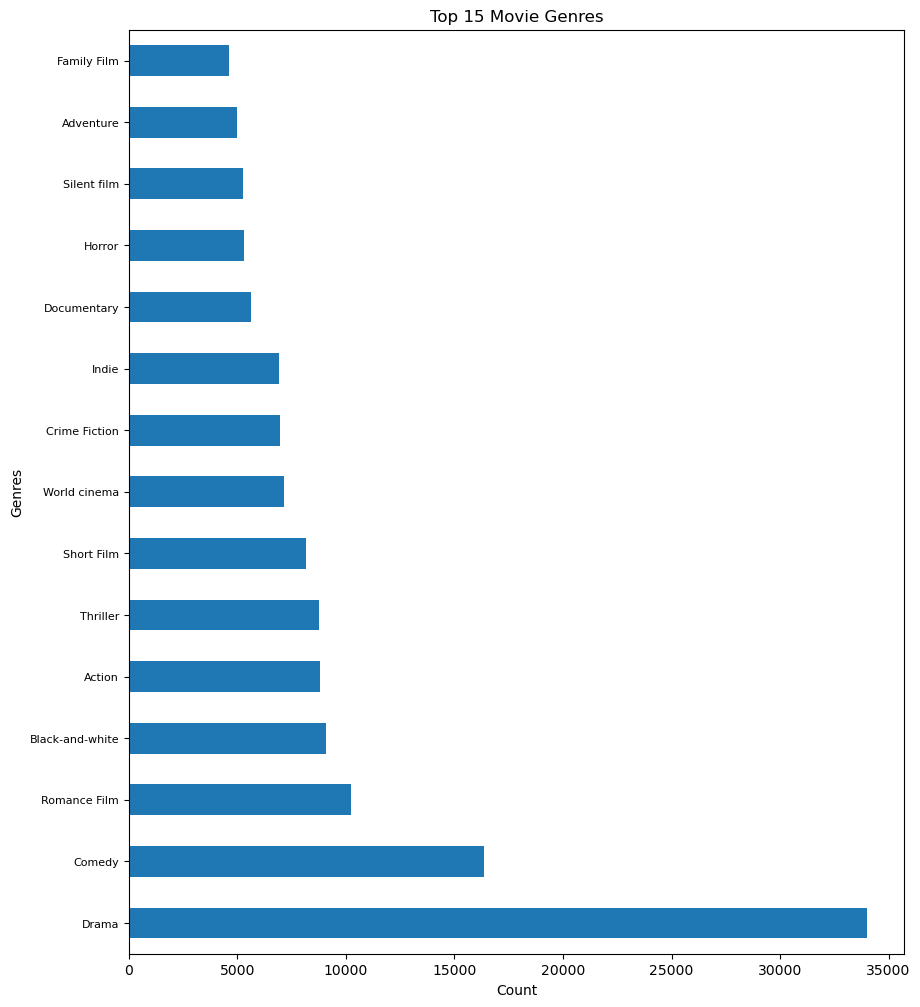

----------------------------------------
Total number of genres: 364
----------------------------------------


In [29]:
#Function to extract the genres from the "Movie Genres" column
def extract_genres(genres_str):
    genres_dict = ast.literal_eval(genres_str)  
    genres = list(genres_dict.values())  
    return genres

# Applying the function to each row of the DataFrame and concatenate the results
all_genres = movie_metadata_df["Movie Genres"].apply(extract_genres).explode()
genre_counts = all_genres.value_counts()
top_15_genres = genre_counts.head(15)

# Visualize data using horizontal bar plots for the top 100 genres
plt.figure(figsize=(10, 12)) 
top_15_genres.plot(kind='barh')
plt.title("Top 15 Movie Genres")
plt.xlabel("Count")
plt.ylabel("Genres")
plt.tick_params(axis='y', labelsize=8) 
plt.show()

# Calculate the total number of genres
total_genres = len(all_genres.unique())
print('----------------------------------------')
print("Total number of genres:", total_genres)
print('----------------------------------------')

This bar plot show the genre which occurs the most in the dataset. this shows us which is the most popular genre in the dataset. Directors can use this information to make movies that are more likely to be successful. along with more valuable insights.

In [30]:
# To understand the character metadata
print(character_metadata_df.head())
print(character_metadata_df.info())
print(character_metadata_df.isnull().sum())

   Wikipedia Movie ID Freebase Movie ID Movie Release Date  \
0              975900         /m/03vyhn         2001-08-24   
1              975900         /m/03vyhn         2001-08-24   
2              975900         /m/03vyhn         2001-08-24   
3              975900         /m/03vyhn         2001-08-24   
4              975900         /m/03vyhn         2001-08-24   

               Character Name   Actor DOB Actor Gender  Actor Height  \
0                    Akooshay  1958-08-26            F         1.620   
1  Lieutenant Melanie Ballard  1974-08-15            F         1.780   
2         Desolation Williams  1969-06-15            M         1.727   
3          Sgt Jericho Butler  1967-09-12            M         1.750   
4             Bashira Kincaid  1977-09-25            F         1.650   

  Actor Ethnicity          Actor Name  Actor Age at Movie Release  \
0             NaN      Wanda De Jesus                        42.0   
1      /m/044038p  Natasha Henstridge                   

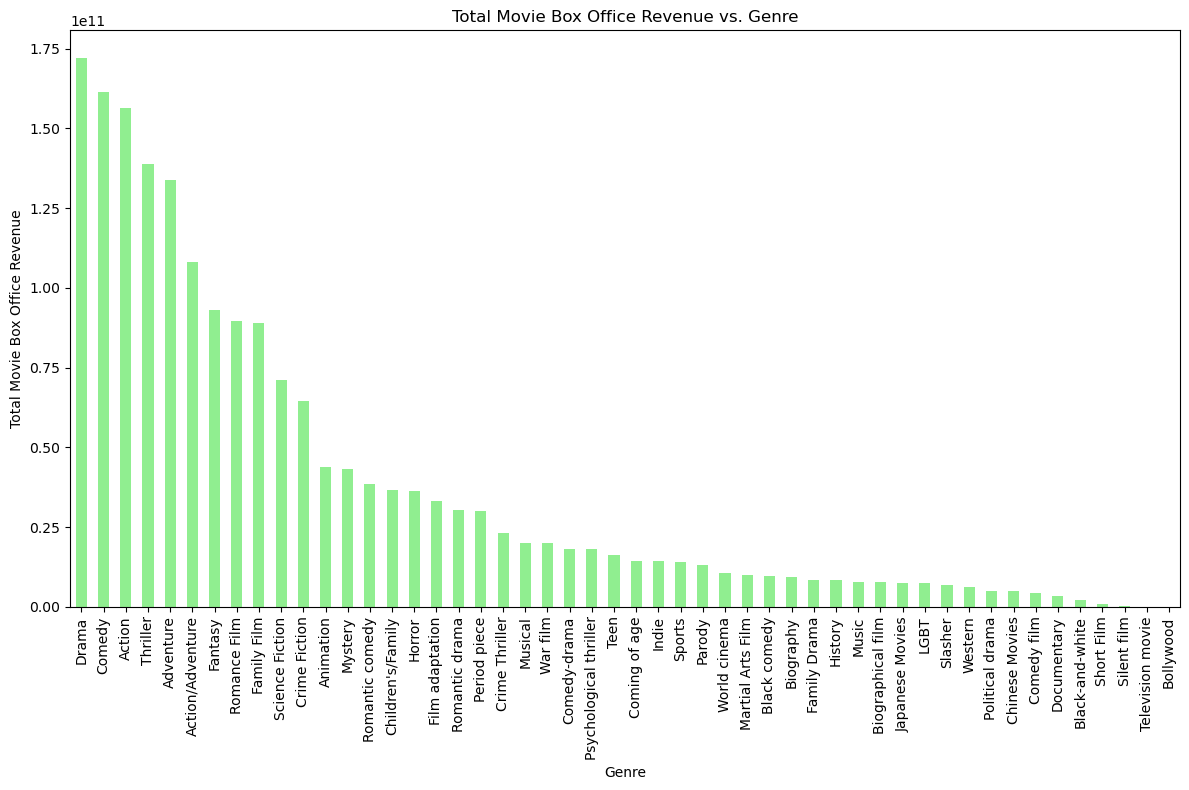

In [31]:

movie_metadata_df["Genres"] = movie_metadata_df["Movie Genres"].apply(extract_genres)
movie_genres_df = movie_metadata_df.explode("Genres")
movie_genres_df = movie_genres_df.dropna(subset=["Movie Box Office Revenue"])

top_50_genres = genre_counts.head(50).index
movie_genres_df = movie_genres_df[movie_genres_df["Genres"].isin(top_50_genres)]

movie_genres_df["Movie Box Office Revenue"] = pd.to_numeric(movie_genres_df["Movie Box Office Revenue"])

# Calculate the total revenue for each genre
total_revenue_by_genre = movie_genres_df.groupby("Genres")["Movie Box Office Revenue"].sum().sort_values(ascending=False)

# Plot the bar plot
plt.figure(figsize=(12, 8))
total_revenue_by_genre.plot(kind='bar', color='lightgreen')
plt.title("Total Movie Box Office Revenue vs. Genre")
plt.xlabel("Genre")
plt.ylabel("Total Movie Box Office Revenue")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


The bar plot displays the total movie box office revenue in USD for each genre, sorted in descending order of total revenue. 

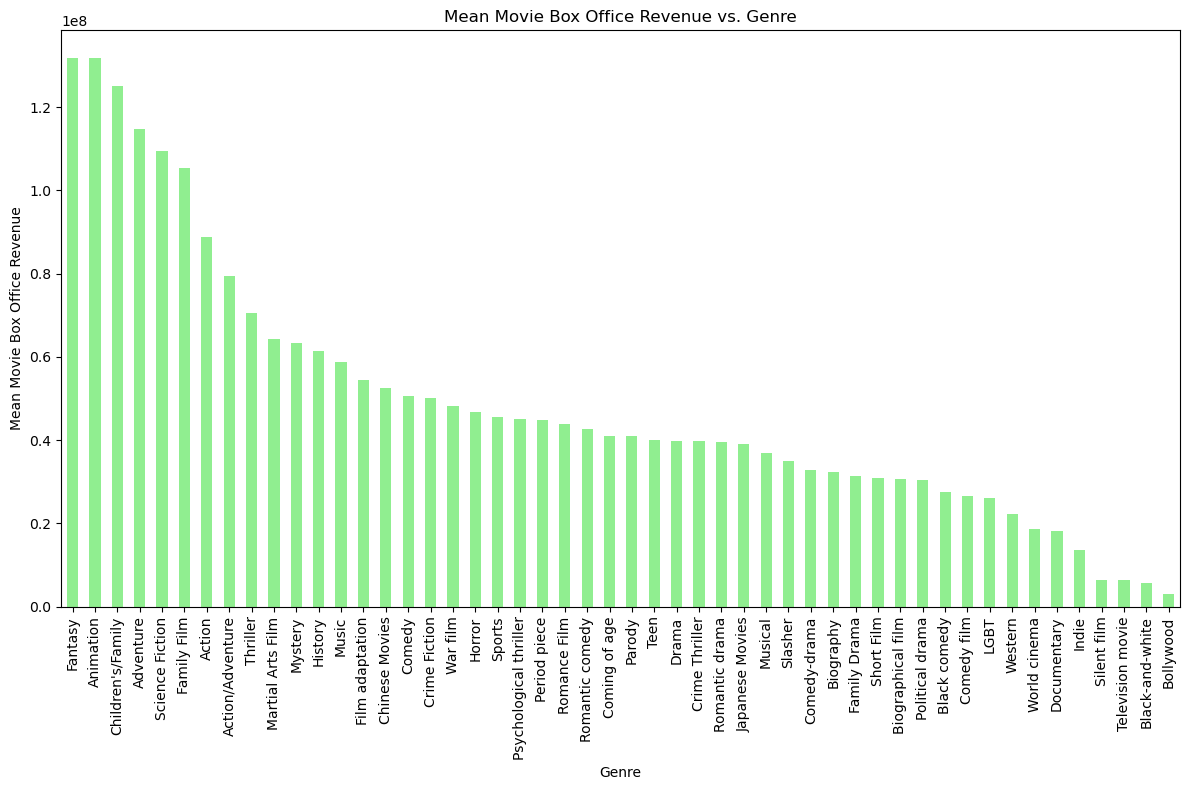

In [32]:
# Calculate the total revenue for each genre
mean_revenue_by_genre = movie_genres_df.groupby("Genres")["Movie Box Office Revenue"].mean().sort_values(ascending=False)

# Plot the bar plot
plt.figure(figsize=(12, 8))
mean_revenue_by_genre.plot(kind='bar', color='lightgreen')
plt.title("Mean Movie Box Office Revenue vs. Genre")
plt.xlabel("Genre")
plt.ylabel("Mean Movie Box Office Revenue")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

The bar plot displays the mean movie box office revenue in USD for each genre, sorted in descending order of mean revenue.


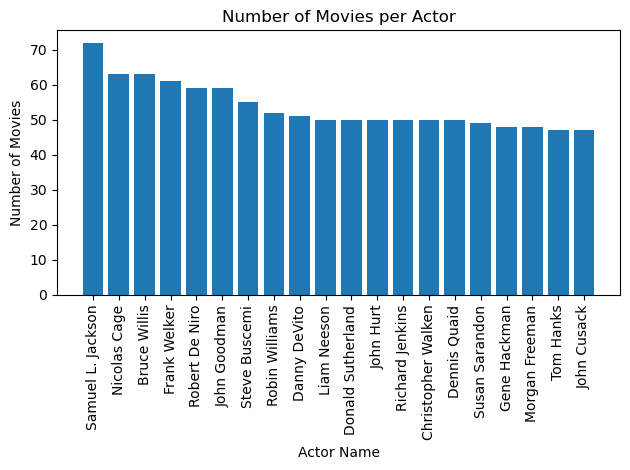

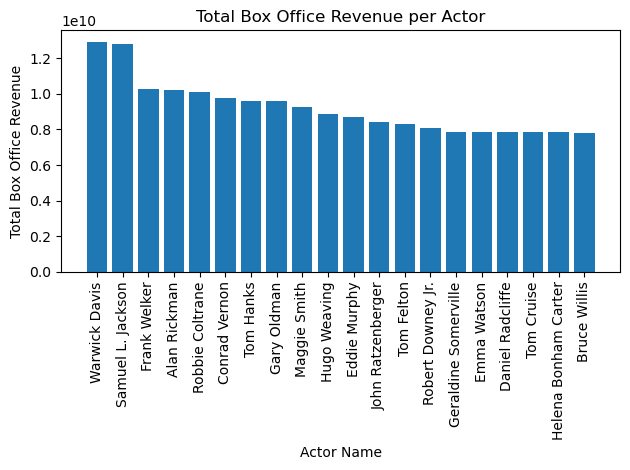

In [33]:

merged_df = pd.merge(character_metadata_df, movie_metadata_df, on="Wikipedia Movie ID", how="inner")
merged_df.dropna(subset=["Actor Name", "Movie Name", "Movie Box Office Revenue"], inplace=True)

# Exploratory Data Analysis
# Analyze the distribution of the number of movies each actor has appeared in
movies_per_actor = (merged_df.groupby("Actor Name")["Movie Name"].count()).sort_values(ascending=False)
plt.bar(movies_per_actor.index[:20], movies_per_actor.values[:20])
plt.title("Number of Movies per Actor")
plt.xlabel("Actor Name")
plt.ylabel("Number of Movies")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


# # Analyze box office success of actors
box_office_revenue_per_actor = (merged_df.groupby("Actor Name")["Movie Box Office Revenue"].sum()).sort_values(ascending=False)
plt.bar(box_office_revenue_per_actor.index[:20], box_office_revenue_per_actor.values[:20])
plt.title("Total Box Office Revenue per Actor")
plt.xlabel("Actor Name")
plt.ylabel("Total Box Office Revenue")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


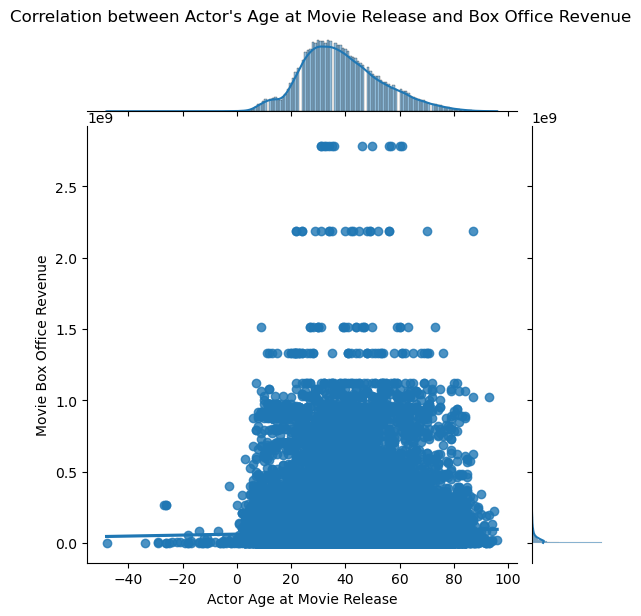

Most common age of actors in the dataset: 34.0


In [34]:
import seaborn as sns

# Create a joint plot with regression line
sns.jointplot(x='Actor Age at Movie Release', y='Movie Box Office Revenue', data=merged_df, kind='reg')
plt.suptitle("Correlation between Actor's Age at Movie Release and Box Office Revenue", x=0.5, y=1.02)
plt.xlabel("Actor Age at Movie Release")
plt.ylabel("Movie Box Office Revenue")
plt.show()

#write code to print the most common age of actors in the dataset
most_common_age = merged_df["Actor Age at Movie Release"].mode()[0]
print("Most common age of actors in the dataset:", most_common_age)



In [35]:
print(movie_metadata_df['Genres'].head())


0    [Thriller, Science Fiction, Horror, Adventure,...
1     [Mystery, Biographical film, Drama, Crime Drama]
2                               [Crime Fiction, Drama]
3    [Thriller, Erotic thriller, Psychological thri...
4                                              [Drama]
Name: Genres, dtype: object


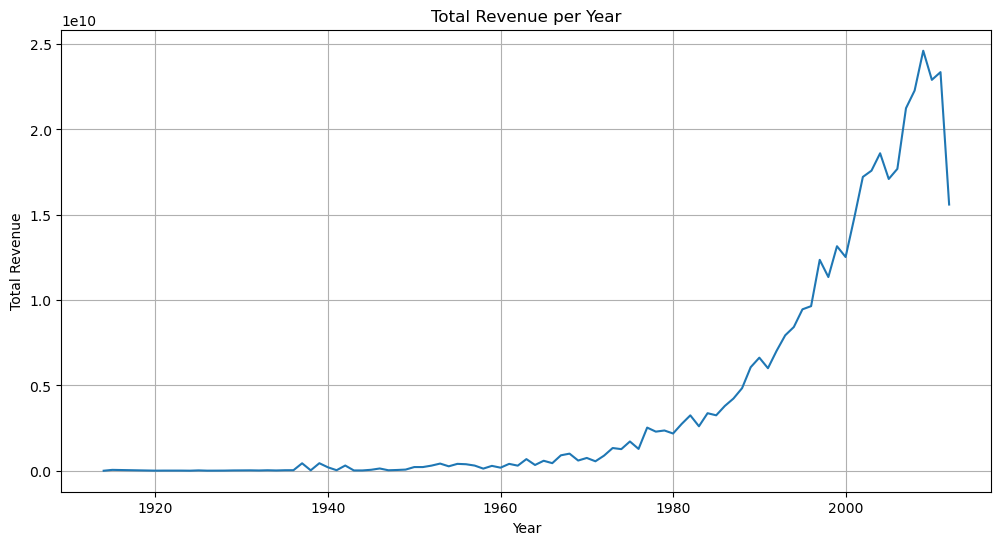

In [36]:

# Selecting relevant features
features = ['Genres', 'Movie Runtime', 'Movie Release Date', 'Movie Languages', 'Movie Countries', 'Movie Box Office Revenue']

# Extracting only the relevant columns
data = movie_metadata_df[features].dropna()

# Preprocessing the data for each column
data['Movie Release Date'] = data['Movie Release Date'].str.extract(r'(\d{4})')
data['Movie Release Date'] = pd.to_numeric(data['Movie Release Date'])


data['Movie Release Date'] = data['Movie Release Date'].drop(data[data['Movie Release Date'] < 1900].index)

# for each release year, calculate the total revenue in that year
revenue_per_year = data.groupby('Movie Release Date')['Movie Box Office Revenue'].sum()

# Plot the total revenue per year
plt.figure(figsize=(12, 6))
revenue_per_year.plot()
plt.title("Total Revenue per Year")
plt.xlabel("Year")
plt.ylabel("Total Revenue")
plt.grid()
plt.show()





In [39]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans

plot_file = "MovieSummaries/plot_summaries.txt"

with open(plot_file, 'r') as file:
    plot_summaries_data = file.readlines()

movie_ids = [int(parts[0]) for line in plot_summaries_data 
             if (parts := line.strip().split('\t')) and len(parts) >= 2]
summaries = [' '.join(parts[1:]) for parts in (line.strip().split('\t') for line in plot_summaries_data) if len(parts) >= 2]

vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(summaries)

num_clusters = 20
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X)

label_clusters = kmeans.labels_

movie_names = pd.DataFrame({"Wikipedia Movie ID": movie_ids})
movie_names = movie_names.merge(movie_metadata_df[["Wikipedia Movie ID", "Movie Name"]],on="Wikipedia Movie ID", how="left")

movies_clusters = {}
for i, cluster_label in enumerate(label_clusters):
    if cluster_label not in movies_clusters:
        movies_clusters[cluster_label] = []
    movies_clusters[cluster_label].append(movie_names.iloc[i]["Movie Name"])

for cluster_label, movies in movies_clusters.items():
    print(f"Cluster {cluster_label + 1}:")
    movie_names = movies[:10] 
    print(", ".join(movie_names))  
    print("Total Movies:", len(movies))
    print()

/opt/miniconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster 4:
Taxi Blues, The Hunger Games, Destination Meatball, Up and Down, Charlie Chan's Secret, Ashes to Ashes, Red's Dream, Nee Sneham, Bhagwan Dada, Kehtaa Hai Dil Baar Baar
Total Movies: 14922

Cluster 10:
Narasimham, Dark Water, Husband for Hire, Come Back, Africa, Mr. & Mrs. '55, Eastern Promises, You, Kelviyum Naane Pathilum Naane, Geometria, Wait Until Spring, Bandini
Total Movies: 5763

Cluster 13:
The Lemon Drop Kid, A Cry in the Dark, End Game, House Party 2, Pieces, Killjoy, Jaws: The Revenge, Hush… Hush, Sweet Charlotte, Treed Murray, Expired
Total Movies: 6392

Cluster 9:
Sing, The Biggest Fan, A la salida nos vemos, Girl, Positive, The Incredibly True Adventure of Two Girls in Love, Classmates, Friendship, The Brotherhood III: Young Demons, Fish Hooky, American Pie Presents: The Book of Love
Total Movies: 1460

Cluster 17:
Meet John Doe, Darkness, A Modern Hero, Saturday the 14th, The Tie That Binds, All Quiet on the Western Front, Let Sleeping Corpses Lie, Heat Lightn

TypeError: sequence item 8: expected str instance, float found